# Analyze Stock Data with Bollinger Bands, WMA5, and WMA10

Explanation of the Indicators:

(1) Weighted Moving Average (WMA): This is a type of moving average where more recent data points have higher weights. The weights decrease in arithmetic progression.

    WMA5: The 5-day weighted moving average.
    WMA10: The 10-day weighted moving average.

(2) Bollinger Bands: This is a volatility indicator that consists of a middle band (20-period SMA), an upper band (SMA + 2 standard deviations), and a lower band (SMA - 2 standard deviations).

Customization
    
Replace xxx.BK with the stock symbol you are interested in for Thailand.

Adjust the start and end dates to match your desired time period.

This code will download the historical data, calculate the Bollinger Bands, WMA5, and WMA10, and then plot them on a chart for easy visualization. Let me know if you need further adjustments!

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime

In [30]:
# Get today's date to use as the end date
end_date = datetime.today().strftime('%Y-%m-%d')

# Download historical stock data from Yahoo Finance (e.g., for PTT Public Company Limited in Thailand)

stock_symbol = 'TISCO.BK'  # Replace this with the stock symbol for the Stock Exchange of Thailand

data = yf.download(stock_symbol, start='2023-01-01', end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [31]:
# Calculate the 5-period Weighted Moving Average (WMA5)
data['WMA5'] = data['Close'].rolling(window=5).apply(lambda prices: np.dot(prices, np.arange(1, 6)) / 15, raw=True)

# Calculate the 10-period Weighted Moving Average (WMA10)
data['WMA10'] = data['Close'].rolling(window=10).apply(lambda prices: np.dot(prices, np.arange(1, 11)) / 55, raw=True)

# Calculate the Bollinger Bands (20-period SMA and 2 standard deviations)
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Bollinger_Upper'] = data['SMA20'] + 2 * data['Close'].rolling(window=20).std()
data['Bollinger_Lower'] = data['SMA20'] - 2 * data['Close'].rolling(window=20).std()

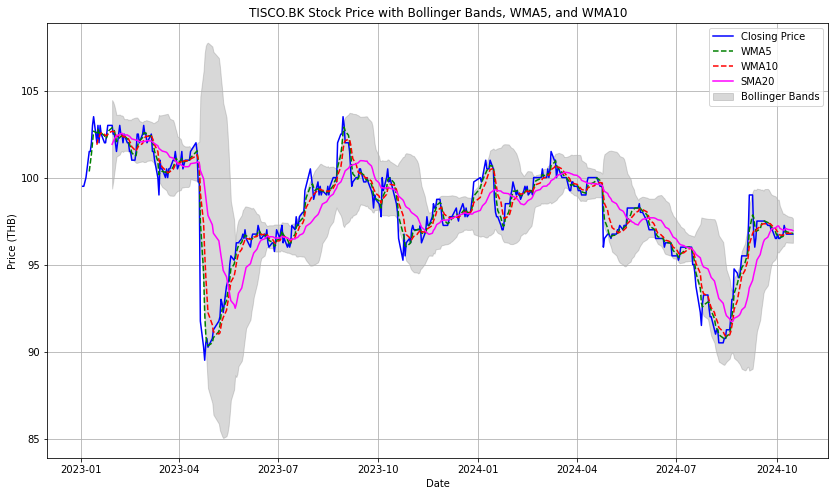

In [32]:
# Plot the data
plt.figure(figsize=(14, 8))

# Plot the closing price and indicators
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['WMA5'], label='WMA5', color='green', linestyle='--')
plt.plot(data['WMA10'], label='WMA10', color='red', linestyle='--')
plt.plot(data['SMA20'], label='SMA20', color='magenta')
plt.fill_between(data.index, data['Bollinger_Upper'], data['Bollinger_Lower'], color='gray', alpha=0.3, label='Bollinger Bands')

# Add labels and legend
plt.title(f'{stock_symbol} Stock Price with Bollinger Bands, WMA5, and WMA10')
plt.xlabel('Date')
plt.ylabel('Price (THB)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Interpreting the Bollinger Bands, Weighted Moving Averages (WMA5 and WMA10), and the stock price chart can give you insights into the stock's price trends, volatility, and potential trading signals. Here's how to interpret each element on the graph:

1. Bollinger Bands
Bollinger Bands consist of three lines:

Middle Band (SMA20): The simple moving average (SMA) over 20 periods.
Upper Band: SMA20 plus two standard deviations of the price.
Lower Band: SMA20 minus two standard deviations of the price.
Interpretation:

Price near the Upper Band: This indicates the stock is potentially overbought. It might be a sign that the price could reverse or pull back.
Price near the Lower Band: This indicates the stock is potentially oversold. It might be a sign that the price could bounce back up.
Breakout above the Upper Band: Often interpreted as a continuation of an upward trend, signaling a potential buying opportunity.
Breakout below the Lower Band: Often indicates a continuation of a downward trend, signaling a potential selling opportunity.
Squeeze: When the bands come closer together (narrow), it indicates low volatility, which is often followed by a period of high volatility and possible price breakouts.
Expansion: When the bands move further apart (widen), it indicates high volatility.


2. Weighted Moving Averages (WMA5 and WMA10)
Weighted moving averages give more importance to recent prices, which makes them more responsive to price changes.

Interpretation:

WMA5 above WMA10: If the 5-period WMA (shorter-term) crosses above the 10-period WMA (longer-term), it could indicate a bullish signal or an upward trend. This is a possible buying opportunity.
WMA5 below WMA10: If the 5-period WMA crosses below the 10-period WMA, it could indicate a bearish signal or a downward trend. This is a possible selling opportunity.
Crossover Signals: Crossovers between WMA5 and WMA10 are often used as short-term trading signals. A bullish crossover happens when WMA5 rises above WMA10, and a bearish crossover occurs when WMA5 falls below WMA10.


3. Closing Price
The Closing Price line shows the actual stock price movement over time.
Observe how the price interacts with the Bollinger Bands and the WMAs for potential entry and exit points.
Combining Signals for Trading Strategy
When interpreting the graph, it's important to look at the indicators together to make more informed decisions:

Buy Signal:

The closing price moves from the lower Bollinger Band towards the middle or upper band.
WMA5 crosses above WMA10 (bullish crossover).
Price breaks out above the upper Bollinger Band, suggesting momentum in the upward direction.
Sell Signal:

The closing price moves from the upper Bollinger Band towards the middle or lower band.
WMA5 crosses below WMA10 (bearish crossover).
Price breaks down below the lower Bollinger Band, indicating downward momentum.


Risk Management
False Signals: Sometimes, these indicators may generate false signals, so it's crucial to use them in combination with other factors such as trading volume, market trends, or other technical indicators.
Volatility: High volatility in the stock can lead to sudden price movements, so watch for the Bollinger Band squeeze as an early warning for a potential breakout.

In [33]:
# Signal detection logic
latest_data = data.iloc[-2:]  # Use the last two rows of data to check for crossover patterns

# Initialize signals
signal = 'Hold'

# Buy signal conditions
if latest_data['Close'].iloc[-1] > latest_data['Bollinger_Lower'].iloc[-1] and latest_data['WMA5'].iloc[-1] > latest_data['WMA10'].iloc[-1] and latest_data['WMA5'].iloc[-2] <= latest_data['WMA10'].iloc[-2]:
    signal = 'Buy'

# Sell signal conditions
elif latest_data['Close'].iloc[-1] < latest_data['Bollinger_Upper'].iloc[-1] and latest_data['WMA5'].iloc[-1] < latest_data['WMA10'].iloc[-1] and latest_data['WMA5'].iloc[-2] >= latest_data['WMA10'].iloc[-2]:
    signal = 'Sell'

# Display the trading signal
print(f'Trading Signal for {stock_symbol} based on the latest data: {signal}')

Trading Signal for TISCO.BK based on the latest data: Sell


Explanation of the Signal Detection:

    Buy Signal: The conditions check if the closing price is above the lower Bollinger Band and if the WMA5 has just crossed above the WMA10 (bullish crossover).
    
    Sell Signal: The conditions check if the closing price is below the upper Bollinger Band and if the WMA5 has just crossed below the WMA10 (bearish crossover).

    Hold: If neither the buy nor the sell conditions are met, the signal remains as "Hold," suggesting that no clear trading action is advised.